In [ ]:
# **Project 1 Report**

Jayam Sutariya

CS458

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [4]:
# Codes for P1-1(a)

import numpy as np
import math
from pandas import DataFrame
from pandas import Series

def dist(p1, p2, dimens):
    fDis = 0
    for i in range(dimens):
        fDis += pow((p1[i] - p2[i]), 2)
    return (math.sqrt(fDis))
        
datapoints = 1000
dimens = 2

data = np.random.randn(datapoints, dimens)

max_dis = 0.0
min_dis = 999999.0
    
for i in range(datapoints):
    for j in range(i+1, datapoints):
        max_dis = max(max_dis, dist(data[i], data[j], dimens))
        min_dis = min(min_dis, dist(data[i], data[j], dimens))
    
diff = max_dis - min_dis
print("Difference between max and min distance: ", diff)

Difference between max and min distance:  7.037868725497851


**(b) Repeat (a) for different dimensions from 2 to 50.**

<AxesSubplot:title={'center':'Curse of Dimensionality'}>

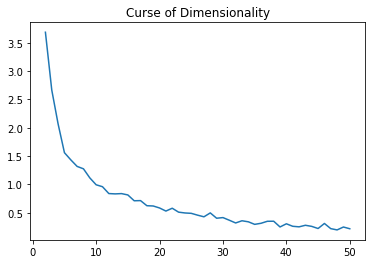

In [30]:
# Codes for P2-1(b)
import numpy as np
import math
from pandas import DataFrame
from pandas import Series

def dist(p1, p2, dimens):
    fDis = 0
    for i in range(dimens):
        fDis += pow((p1[i] - p2[i]), 2)
    return (math.sqrt(fDis))
        
dimenArr = []
yArr = []

datapoints = 1000
dimens = 2

while dimens <= 50: 
    #print(dimens)
    data = np.random.randn(datapoints, dimens)
    #print(data)

    max_dis = 0.0
    min_dis = 999999.0
    
    for i in range(datapoints):
        for j in range(i+1, datapoints):
            max_dis = max(max_dis, dist(data[i], data[j], dimens))
            min_dis = min(min_dis, dist(data[i], data[j], dimens))
    
    diff = max_dis - min_dis
    yVal = math.log((diff/min_dis), 10)
    
    dimenArr.append(dimens)
    yArr.append(yVal)
    
    dimens = dimens + 1

%matplotlib inline

s1 = Series(yArr, index = dimenArr)
s1.plot(kind='line', title='Curse of Dimensionality')

Plot log_10(max-min)/min under different number of dimensions. 

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

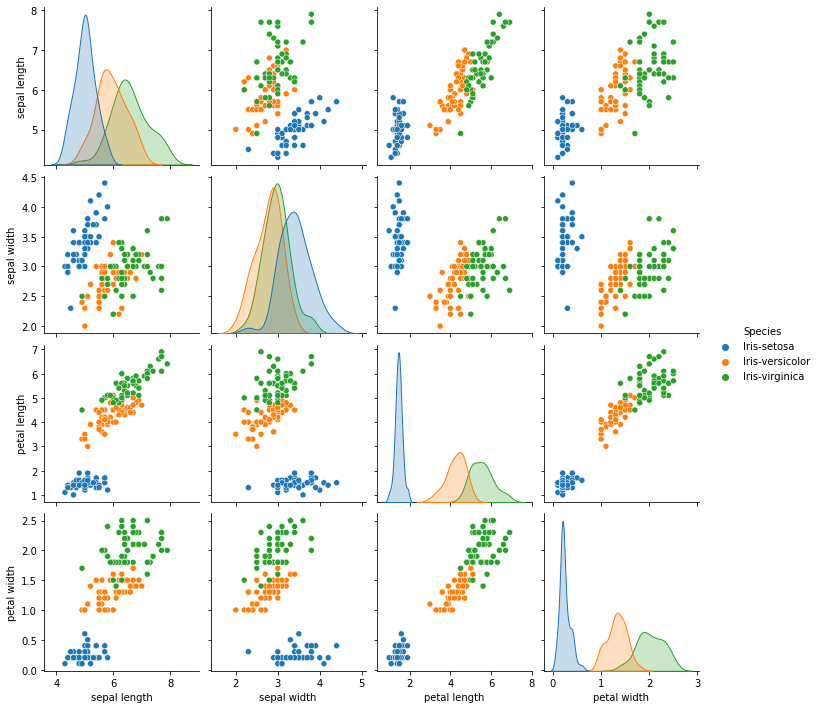

In [20]:
# Codes for P1-2(a)
import pandas as pd
import seaborn as sns

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'Species']

sns.pairplot(data, hue = 'Species')

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

The interval values from the petal length bins were: 2.633 and 4.9.
The interval values from the petal width bins were: 0.867 and 1.6


Incorrectly separated setosa samples: 0
Incorrectly separated versicolor samples: 3
Incorrectly separated virginica samples: 6


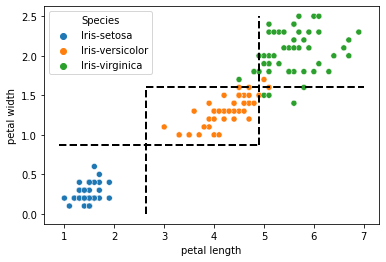

In [52]:
# Codes for P1-2(b)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'Species']

sns.scatterplot(data=data, x="petal length", y="petal width", hue="Species")

#bins = pd.qcut(data['petal length'], 3)
#bins.value_counts(sort=False)
#The values from the bins were: 2.633 and 4.9

#bins2 = pd.qcut(data['petal width'], 3)
#bins2.value_counts(sort=False)
#The values from the bins were: 0.867 and 1.6

print("The interval values from the petal length bins were: 2.633 and 4.9.")
print("The interval values from the petal width bins were: 0.867 and 1.6")

plt.plot([2.633, 2.633], [0, 1.6], linewidth=2, color="black", linestyle="dashed")
plt.plot([4.9, 4.9], [0.867, 2.5], linewidth=2, color="black", linestyle="dashed")
plt.plot([0.9, 4.9], [0.867, 0.867], linewidth=2, color="black", linestyle="dashed")
plt.plot([2.633, 7], [1.6, 1.6], linewidth=2, color="black", linestyle="dashed")

plength = data['petal length']
pwidth = data['petal width']
sname = data['Species']
#'''
setcount = 0
versicount = 0
virgincount = 0
for i in range(len(plength)):
    if (sname[i] == "Iris-setosa"):
        if ( (plength[i] > 2.633) | (pwidth[i] > 0.867) ):
            setcount += 1
    if (sname[i] == "Iris-versicolor"):
        if ( (plength[i] > 4.9) | (pwidth[i] > 1.6) ):
            versicount += 1
    if (sname[i] == "Iris-virginica"):
        if ( (plength[i] < 4.9) | (pwidth[i] < 1.6) ):
            virgincount += 1

print("\n")
print("Incorrectly separated setosa samples:", setcount)
print("Incorrectly separated versicolor samples:", versicount)
print("Incorrectly separated virginica samples:", virgincount)
#'''

The discretization was done using histograms. The histogram was split into 3 bins using the qcut funtion from the pandas library. The data was divided nicely into 3 bins. The process was done one time for the petal length and one for the petal width. Based on the output of the bin intervals, straight line were plotted at those intervals to dicretize the data into 3 species. 

In this case, the setosa species is discretized perfectly. The versicolor species is mostly separated perfectly. Only 3 samples are incorrectly separated for the versicolor species. The virginica species is also mostly discretized perfectly. For the virginica species, there are 6 samples that were incorrectly separated. 

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

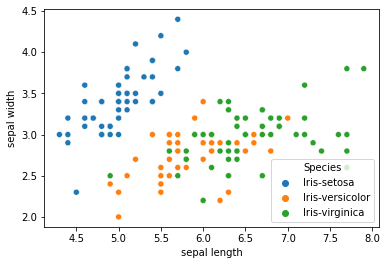

In [29]:
# Codes for P1-3(a)
import pandas as pd
import seaborn as sns

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'Species']

sns.scatterplot(data=data, x="sepal length", y="sepal width", hue="Species")

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

Text(0.5, 1.0, 'PCA of IRIS dataset')

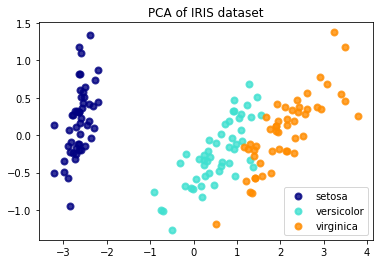

In [49]:
# Codes for P1-3(b)
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Although, the setosa species data samples appear mostly separated from the rest of the two species, the samples in part (a) still seem very clustered. It seems very difficult to separate the samples based on the species when the features are sepal length and sepal width. Specifically, a lot of the versicolor and virginica species samples are intertwined and not well separated at all. 

After reducing the dimensions from 4 to 2 in the iris dataset using PCA, the plot looks much better. The species are much less intertwined with eachother. In comparison to the figure in part (a), this is an immense upgrade in terms of dataset sample separability based on the type of species. The setosa species is completely clustered by its own and easily separated. The versicolor and virginica samples are clustered together with other samples from their respective species. There are still some samples which seem difficult to separate, but the number of those is way less than the ones in part (a)